In [1]:
import time
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
K.set_image_data_format("channels_last")

import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
from PIL import Image

import pickle
import cv2
import os
import random
from keras.utils.data_utils import get_file

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
PATH='./CINIC-10'
total_images_train_airplane = os.listdir(PATH+'/train/airplane/')
total_images_train_automobile = os.listdir(PATH+'/train/automobile/')
total_images_train_bird = os.listdir(PATH+'/train/bird/')
total_images_train_cat = os.listdir(PATH+'/train/cat/')
total_images_train_deer = os.listdir(PATH+'/train/deer/')
total_images_train_dog = os.listdir(PATH+'/train/dog/')
total_images_train_frog = os.listdir(PATH+'/train/frog/')
total_images_train_horse = os.listdir(PATH+'/train/horse/')
total_images_train_ship = os.listdir(PATH+'/train/ship/')
total_images_train_truck = os.listdir(PATH+'/train/truck/')

total_images_test_airplane = os.listdir(PATH+'/test/airplane/')
total_images_test_automobile = os.listdir(PATH+'/test/automobile/')
total_images_test_bird = os.listdir(PATH+'/test/bird/')
total_images_test_cat = os.listdir(PATH+'/test/cat/')
total_images_test_deer = os.listdir(PATH+'/test/deer/')
total_images_test_dog = os.listdir(PATH+'/test/dog/')
total_images_test_frog = os.listdir(PATH+'/test/frog/')
total_images_test_horse = os.listdir(PATH+'/test/horse/')
total_images_test_ship = os.listdir(PATH+'/test/ship/')
total_images_test_truck = os.listdir(PATH+'/test/truck/')


print('total_images_train_airplane:',len(total_images_train_airplane))
print('total_images_train_automobile:',len(total_images_train_automobile))
print('total_images_train_bird:',len(total_images_train_bird))
print('total_images_train_cat:',len(total_images_train_cat))
print('total_images_train_deer:',len(total_images_train_deer))
print('total_images_train_dog:',len(total_images_train_automobile))
print('total_images_train_frog:',len(total_images_train_frog))
print('total_images_train_horse:',len(total_images_train_horse))
print('total_images_train_ship:',len(total_images_train_ship))
print('total_images_train_truck:',len(total_images_train_truck))

print('total_images_test_airplane:',len(total_images_test_airplane))
print('total_images_test_automobile:',len(total_images_test_automobile))
print('total_images_test_bird:',len(total_images_test_bird))
print('total_images_test_cat:',len(total_images_test_cat))
print('total_images_test_deer:',len(total_images_test_deer))
print('total_images_test_dog:',len(total_images_test_automobile))
print('total_images_test_frog:',len(total_images_test_frog))
print('total_images_test_horse:',len(total_images_test_horse))
print('total_images_test_ship:',len(total_images_test_ship))
print('total_images_test_truck:',len(total_images_test_truck))

total_images_train_airplane: 9000
total_images_train_automobile: 9000
total_images_train_bird: 9000
total_images_train_cat: 9000
total_images_train_deer: 9000
total_images_train_dog: 9000
total_images_train_frog: 9000
total_images_train_horse: 9000
total_images_train_ship: 9000
total_images_train_truck: 9000
total_images_test_airplane: 9000
total_images_test_automobile: 9000
total_images_test_bird: 9000
total_images_test_cat: 9000
total_images_test_deer: 9000
total_images_test_dog: 9000
total_images_test_frog: 9000
total_images_test_horse: 9000
total_images_test_ship: 9000
total_images_test_truck: 9000


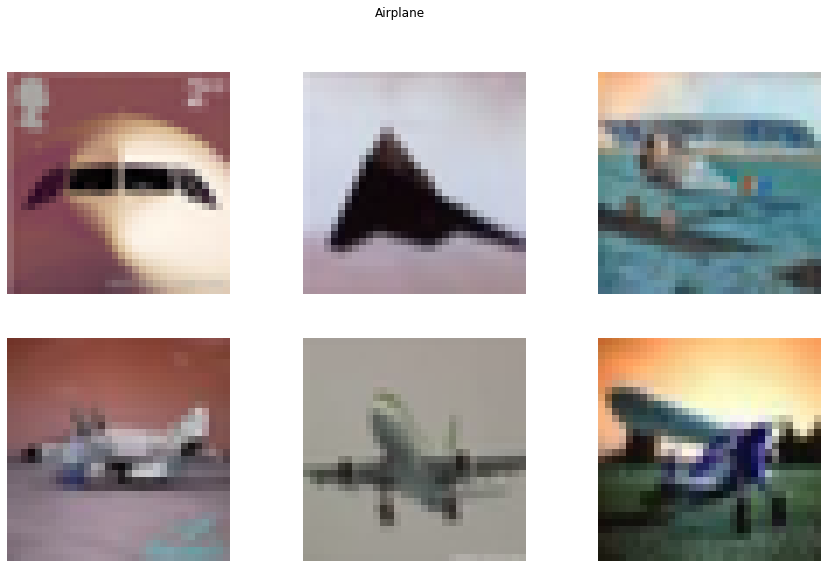

In [3]:
sample_normal = random.sample(total_images_train_airplane,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(PATH+'/train/airplane/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Airplane')
plt.show()

(32, 32, 3)


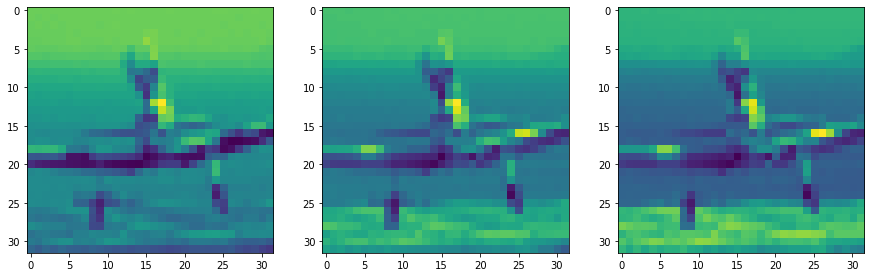

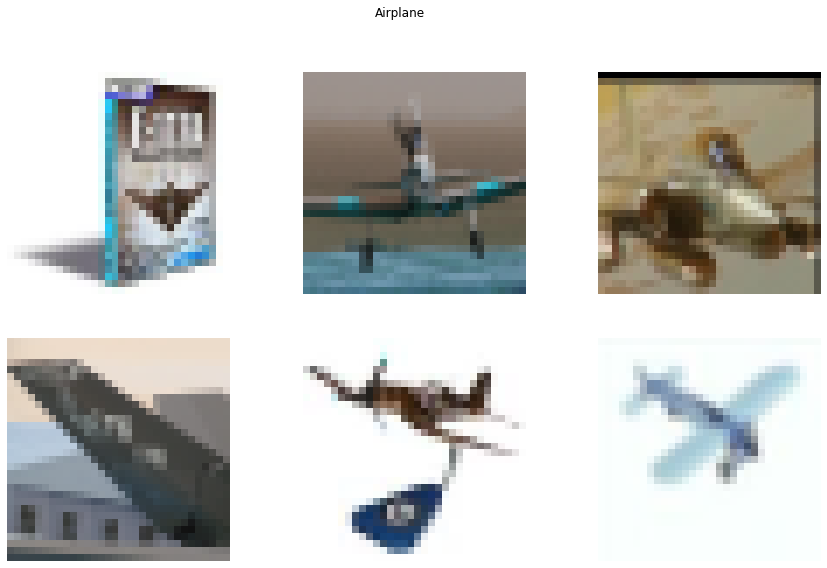

In [4]:
sample_airplane = random.sample(total_images_train_airplane,6)

f,ax = plt.subplots(1,3,figsize=(15,9))
im = cv2.imread(PATH+'/train/airplane/'+sample_airplane[1])
print(im.shape)
ax[0].imshow(im[:,:,0])
ax[1].imshow(im[:,:,1])
ax[2].imshow(im[:,:,2])
plt.show()



f,ax = plt.subplots(2,3,figsize=(15,9))
for i in range(0,6):
    im = cv2.imread(PATH+'/train/airplane/'+sample_airplane[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Airplane')
plt.show()

In [5]:
start_time = time.time()

image_height = 32 #150
image_width = 32 #150
batch_size = 200 #10
no_of_epochs  = 10 #40

In [6]:
# Simples
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile model
lrate = 0.0001
decay = lrate/no_of_epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [7]:
def print_model(model, fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)

In [8]:
print_model(model, "model_cinic10_cnn_simples.png")
#model.summary()

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory(PATH+'/train',
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(PATH+'/test',
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


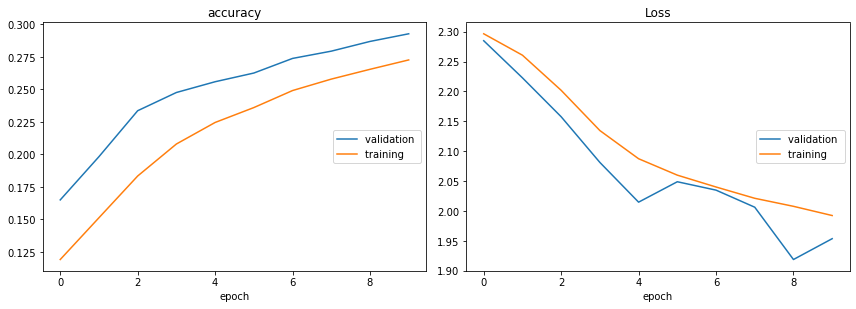

accuracy
	validation       	 (min:    0.165, max:    0.293, cur:    0.293)
	training         	 (min:    0.119, max:    0.273, cur:    0.273)
Loss
	validation       	 (min:    1.919, max:    2.285, cur:    1.954)
	training         	 (min:    1.992, max:    2.296, cur:    1.992)
Accuracy modelo CNN cinic10: 29.28%
Erro modelo CNN cinic10: 70.72%
Tempo processamento: 5022.951 segundos


In [11]:
plotlosses = PlotLossesKeras()
history = model.fit_generator(training_set,
                    epochs=no_of_epochs,
                    validation_data=test_set,
                    verbose=1,
                    callbacks=[PlotLossesKeras()])

# Avaliação final com os casos de teste
scores = model.evaluate_generator(test_set, verbose=0)
#print('Scores: ', scores)
print("Accuracy modelo CNN cinic10: %.2f%%" % (scores[1]*100))
print("Erro modelo CNN cinic10: %.2f%%" % (100-scores[1]*100))
time_taken = time.time() - start_time
print("Tempo processamento: %.3f segundos" % (time_taken))